In [1]:
from skimage import io

# Load the image
image = io.imread('../images/mechanical/chassis-bw.jpeg')

Text(0.5, 1.0, 'Canny filter, $\\sigma=1$')

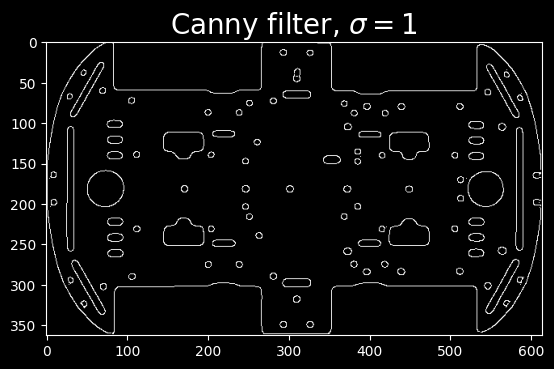

In [18]:
from skimage import color, feature
import matplotlib.pyplot as plt # type: ignore
x_size, y_size, channel = image.shape

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Detect edges, Adjust sigma as needed
edges = feature.canny(gray_image, sigma=3) 


fig, ax = plt.subplots()
# ax.imshow(image, cmap=plt.cm.gray)  # Display the original image (or gray_image if desired)

ax.imshow(edges, cmap='gray')
ax.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

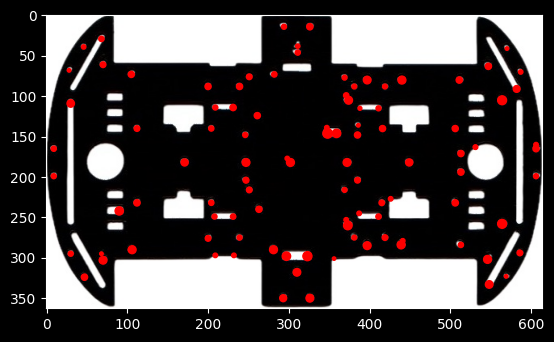

In [10]:
from skimage import transform

import numpy as np

# Detect circles
hough_radii = np.arange(2, 10, 0.1)  # Increased range of radii
hough_res = transform.hough_circle(edges, hough_radii)

# Select the most prominent circles
accums, cx, cy, radii = transform.hough_circle_peaks(
    hough_res, hough_radii, total_num_peaks=100,  # reduce the number of peaks for clarity
    min_xdistance=4, min_ydistance=4  # Added min distance between peaks to avoid overlapping
)

# Plot the detected circles
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)  # Display the original image (or gray_image if desired)
for center_y, center_x, radius in zip(cy, cx, radii):
    circle = plt.Circle((center_x, center_y), radius, color='red',
                        fill=True, linewidth=1)  # Increased line width for visibility
    ax.add_patch(circle)
plt.show()